# OpEn Python Interface Test (Panelty Method)

This example solves a simple optimisation problem by using [OpEn with Python Interface](https://alphaville.github.io/optimization-engine/docs/python-interface). 

This example will use a panelty method to tranform the constrained problem into an unconstrained one. 

## Problem Statement

### Original Problem

Minimise $$f(x) = (x - p_1)^2$$ 

subject to $$x \le p_2$$

where $p \in \mathbb{R}$.

### Unconstrained Version

Minimise  $$T(x) = (x - p_1)^2 + r \cdot \{\max(0, x-p_2) \}$$ 

## Implementation using OpEn

A basic description about how to do can be found [here](https://alphaville.github.io/optimization-engine/docs/python-interface). 


### Code Generation

**Step 1)** Make a new python file, and copy \& paste the following:

```
import casadi.casadi as cs
import opengen as og

x = cs.SX.sym("x", 1)                 # decision variable (num_x = 1)
p = cs.SX.sym("p", 2)                 # parameter (num_p = 2)
f = (x[0]-p[0])**2                    # cost function



f2 = cs.vertcat( cs.fmax(0.0, x[0]-p[1]) )

problem = og.builder.Problem(x, p, f)  \
        .with_penalty_constraints(f2)  \


meta = og.config.OptimizerMeta()                \
    .with_version("0.0.0")                      \
    .with_licence("CC4.0-By")                   \
    .with_optimizer_name("paneltymethod_example")        

build_config = og.config.BuildConfiguration()  \
    .with_build_directory("python_build")      \
    .with_build_mode("debug")                  \
    .with_tcp_interface_config()    

solver_config = og.config.SolverConfiguration()   \
            .with_lfbgs_memory(15)                \
            .with_tolerance(1e-5)                 \
            .with_max_inner_iterations(155)

builder = og.builder.OpEnOptimizerBuilder(problem,
                                          metadata=meta,
                                          build_configuration=build_config,
                                          solver_configuration=solver_config)
builder.build()    
```

Here, in use of OpEn, we do not need to specify $r$ for the unconstrained problem. 



**Step 2)** In a terminal, execute `$ python {the above file name.py}`. Then, the corresponding compiling process will be finished soon. 



### Calling the optimiser

**Step 3)** Make another new python file having the following:

```
import opengen as og

mng = og.tcp.OptimizerTcpManager('python_build/paneltymethod_example')
mng.start()

pong = mng.ping()                 # check if the server is alive
print(pong)
response = mng.call([10.0, 5])  # call the solver over TCP


if response.is_ok():
    # Solver returned a solution
    solution_data = response.get()
    u_star = solution_data.solution
    exit_status = solution_data.exit_status
    solver_time = solution_data.solve_time_ms
    print("Solution: x = ", u_star)
    print("Solver_time: = ", solver_time)
else:
    # Invocation failed - an error report is returned
    solver_error = response.get()
    error_code = solver_error.code
    error_msg = solver_error.message


mng.kill()
```

**Step 4)** In a terminal, execute `$ python {the above file name.py}`

Then, the result will look like

```
{'Pong': 1}
Solution: x =  [-9.999999999999]
Solver_time: =  0.046267
```

### Result
#### **From the above code**


Depending on parameters, the results are

| Case | $$p_1$$   |  $$p_2$$  | Optimum |
|------|-----------|-----------|---------|
|  (1) | $$10$$    |   $$5$$   | $$5$$   |
|  (2) | $$-10$$   |   $$5$$   | $$-10$$ |



#### **Check by Hands**
Actually, the above optimisation problem can be easily solved by hands, and we know its optimum. It can be shown like this. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

##### **Case (1)**

In [2]:
p_1 = 10
p_2 = 5

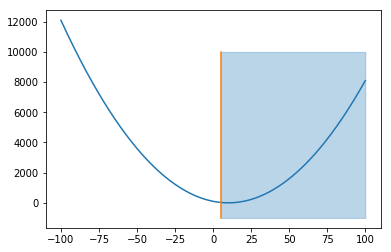

In [3]:
x = np.array(np.arange(-100,100,0.01))  # Start = -50, Stop 50, step 0.01
f = (x-p_1)**2

plt.plot(x,f)
plt.plot([p_2, p_2], [-1000,100**2])
plt.fill_between(x, 10000,-1000, where=(x > p_2), color='C0', alpha = 0.3)

##### **Case (2)**

In [4]:
p_1 = -10
p_2 = 5

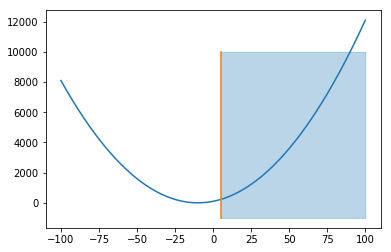

In [5]:
x = np.array(np.arange(-100,100,0.01))  # Start = -50, Stop 50, step 0.01
f = (x-p_1)**2

plt.plot(x,f)
plt.plot([p_2, p_2], [-1000,100**2])
plt.fill_between(x, 10000,-1000, where=(x > p_2), color='C0', alpha = 0.3)